Step0: Imports, GPU support, dataset preparation

In [8]:
# Imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [9]:
# Cuda check
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [10]:
# hyper parameters
input_size = 784
hidden_layers = 300
batch_size = 100
num_classes = 10
num_epochs = 2
lr =.001

In [11]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='/home/arjun/Desktop/Datasets', train=True, transform=transforms.ToTensor(), download=True)
test_dataset =  torchvision.datasets.MNIST(root='/home/arjun/Desktop/Datasets', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=batch_size)
'''
Train loader contains batches
Each batch is a list with 2 tensors- sample and target
'''
print(type(train_dataset))
print(type(train_loader))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torch.utils.data.dataloader.DataLoader'>


If the data is available in a file(or as files), we have to create custom dataset class and put the dataset as dataset class. Then we can convert it into dataLoader format.
Here, we donot need that.
The torchvision provides MNIST in dataset format. We can directly convert it into dataLoader.


torch.Size([28, 28])
torch.Size([28, 28])


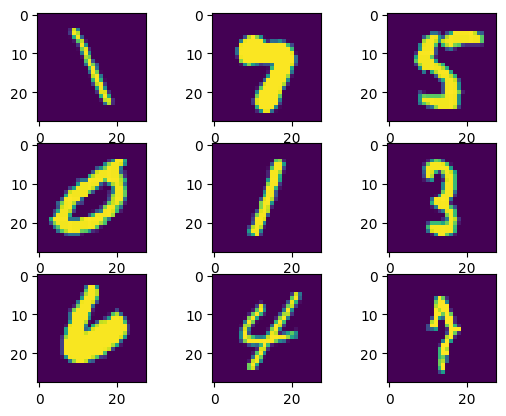

In [12]:
# View
for batch in train_loader:
    sample, label = batch
print(sample[1][0].shape)
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample[i][0])
print(sample[i][0].shape)

Step 1: Model

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, inp_size, hidden_size, out_size):
        super(NeuralNet, self).__init__()
        self.inp_size = inp_size
        self.lay1 = nn.Linear(inp_size, hidden_size)
        self.lay2 = nn.ReLU()
        self.lay3 = nn.Linear(hidden_size, out_size)

    def forward(self,x):
        out = self.lay1(x)
        out = self.lay2(out)
        out = self.lay3(out)  # We don't apply sotmax the cross entropy loss will do that for us
        return out
    
model = NeuralNet(input_size, hidden_layers, num_classes).to(device)

Step 2: Loss and optimiser

In [14]:
lossCategory = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr = lr)

Step 3: Training Loop

In [19]:
n_tot_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):
        # Reshape: [100,1,28,28] -> [100,784]
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        output = model(images)

        # Backward pass
        loss = lossCategory(output, labels)
        loss.backward()
        optimiser.step()
        optimiser.zero_grad()

        # Print details
        if ((i)%200) == 0:
            print(f"Epoch:{epoch+1}/{num_epochs}  Step:{i}/{n_tot_steps}  Loss:{loss}")


Epoch:1/2  Step:0/600  Loss:0.027277011424303055
Epoch:1/2  Step:200/600  Loss:0.042553506791591644
Epoch:1/2  Step:400/600  Loss:0.02689468115568161
Epoch:2/2  Step:0/600  Loss:0.10611838102340698
Epoch:2/2  Step:200/600  Loss:0.04960741847753525
Epoch:2/2  Step:400/600  Loss:0.01296228263527155


Step 4: Testing

In [20]:
with torch.no_grad():
    n_correct, n_samples =0,0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index
        _, prediction = torch.max(outputs,1)
        n_samples += labels.size(0)
        n_correct += (prediction == labels).sum().item()

acc = (n_correct/n_samples)*100
print(f"Accuracy: {acc:.3f}%\nLoss={loss:.3f}")



Accuracy: 97.940%
Loss=0.017
